# CAP Baseline n = 200
random sample

In [179]:
import numpy as np
import pandas

In [180]:
cap_subset_200 = pandas.read_csv('Z:/User Folders/SRajurkar/X3726/CAP Baseline subset n = 200/7.65-32nm/final data.csv')
cap_subset_200.head()

,Sample ID,Center,Area,FWHM,midzone,15.14,15.1403561
0,1.0,14.457100000,0.867600000,3.681250000,13.913951,0.214814,0.214814
1,2.0,14.533600000,0.172876000,0.843518000,13.940082,0.207994,0.207994
2,3.0,none,none,none,19.226145,0.340974,0.340974
3,4.0,14.423000000,0.765979000,4.077730000,11.585062,0.204584,0.204584
4,5.0,14.410800000,1.065000000,3.363600000,17.529256,0.286418,0.286418


In [181]:
cap_no_curve = cap_subset_200[(cap_subset_200['Center'] == 'none') | (cap_subset_200['Center'] == 'excess')]
cap_with_curve = cap_subset_200[(cap_subset_200['Center'] != 'none') & (cap_subset_200['Center'] != 'excess')]

cap_with_curve['Area'] = pandas.to_numeric(cap_with_curve['Area'], errors='coerce')
cap_with_curve['FWHM'] = pandas.to_numeric(cap_with_curve['FWHM'], errors='coerce')
cap_with_curve['Center'] = pandas.to_numeric(cap_with_curve['Center'], errors='coerce')
print(str(len(cap_no_curve)) + ' samples without curves')
print(str(len(cap_with_curve)) + ' samples with curves')
cap_no_curve.head()
cap_with_curve.head()


37 samples without curves
163 samples with curves


C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_812\3532985251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['Area'] = pandas.to_numeric(cap_with_curve['Area'], errors='coerce')
C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_812\3532985251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['FWHM'] = pandas.to_numeric(cap_with_curve['FWHM'], errors='coerce')
C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_812\3532985251.py:6: SettingWithCopyWarning: 
A value is try

,Sample ID,Center,Area,FWHM,midzone,15.14,15.1403561
0,1.0,14.4571,0.867600,3.681250,13.913951,0.214814,0.214814
1,2.0,14.5336,0.172876,0.843518,13.940082,0.207994,0.207994
3,4.0,14.4230,0.765979,4.077730,11.585062,0.204584,0.204584
4,5.0,14.4108,1.065000,3.363600,17.529256,0.286418,0.286418
6,7.0,14.5480,0.801486,1.872990,19.147086,0.426218,0.426218


In [182]:
print(cap_no_curve.describe().head(4))
print(cap_with_curve.describe().head(4))


        Sample ID    midzone      15.14  15.1403561
count   37.000000  37.000000  37.000000   37.000000
mean   100.918919  15.817084   0.253335    0.253335
std     57.689484   4.140147   0.076569    0.076569
min      3.000000   9.379674   0.122751    0.122751
        Sample ID      Center        Area        FWHM     midzone       15.14  \
count  163.000000  163.000000  163.000000  163.000000  163.000000  163.000000   
mean   100.404908   14.556653    0.755715    2.572597   16.767312    0.291585   
std     58.099068    0.311006    0.433539    0.935105    3.836781    0.070591   
min      1.000000   14.028800    0.076994    0.843518    9.652617    0.139799   

       15.1403561  
count  163.000000  
mean     0.291585  
std      0.070591  
min      0.139799  


Distribution of curve centers

<Axes: >

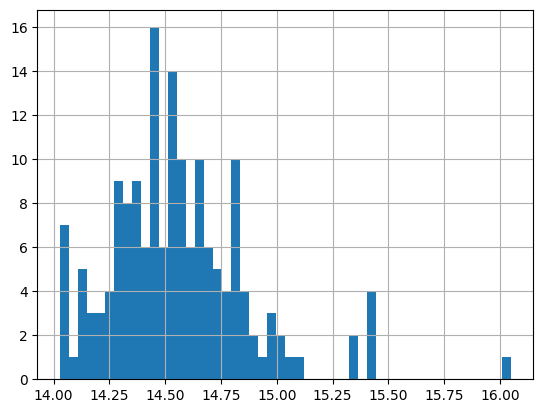

In [190]:
cap_with_curve['Center'].hist(bins=50)

15.14 nm point vs 14.5-18 nm bin

[[1.         0.83893972]
 [0.83893972 1.        ]]


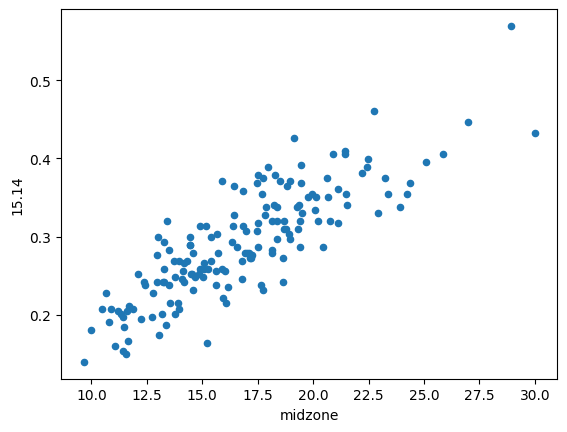

In [184]:
cap_with_curve.plot.scatter('midzone', '15.14')

x = cap_with_curve['midzone']
y = cap_with_curve['15.14']



r = np.corrcoef(x, y)
print(r)

MZ curve area vs 14.5-18 nm bin

[[1.         0.66804652]
 [0.66804652 1.        ]]


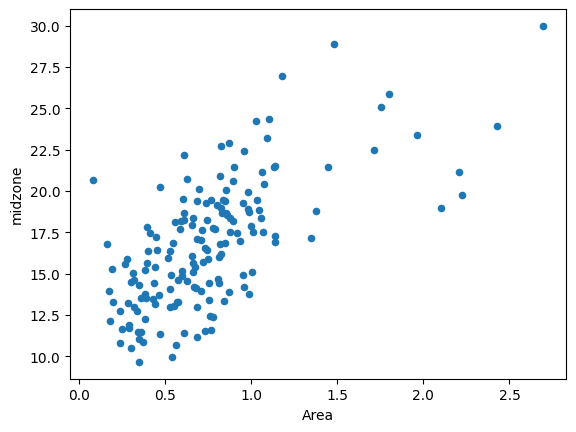

In [185]:

cap_with_curve.plot.scatter('Area', 'midzone')

x = cap_with_curve['Area'].astype(float)
y = cap_with_curve['midzone']


r = np.corrcoef(x, y)

print(r)


MZ curve area vs 15.14 point

[[1.         0.51834635]
 [0.51834635 1.        ]]


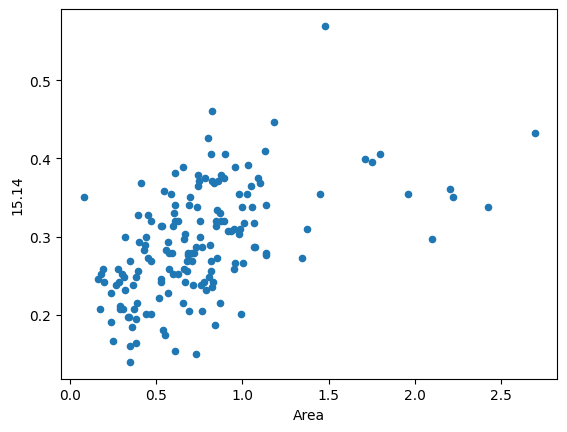

In [186]:
cap_with_curve.plot.scatter('Area', '15.14')

print(np.corrcoef(cap_with_curve['Area'], cap_with_curve['15.14']))

Addition of center - fwhm as a datapoint for each sample

In [193]:

cap_with_curve['lower mz bound'] = cap_with_curve['Center'] - cap_with_curve['FWHM']/2
cap_with_curve['higher mz bound'] = cap_with_curve['Center'] + cap_with_curve['FWHM']/2

C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_812\1172434505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['lower mz bound'] = cap_with_curve['Center'] - cap_with_curve['FWHM']/2
C:\Users\srajurkar\AppData\Local\Temp\1\ipykernel_812\1172434505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap_with_curve['higher mz bound'] = cap_with_curve['Center'] + cap_with_curve['FWHM']/2


In [194]:
cap_with_curve.head()


,Sample ID,Center,Area,FWHM,midzone,15.14,15.1403561,lower mz bound,higher mz bound
0,1.0,14.4571,0.867600,3.681250,13.913951,0.214814,0.214814,12.616475,16.297725
1,2.0,14.5336,0.172876,0.843518,13.940082,0.207994,0.207994,14.111841,14.955359
3,4.0,14.4230,0.765979,4.077730,11.585062,0.204584,0.204584,12.384135,16.461865
4,5.0,14.4108,1.065000,3.363600,17.529256,0.286418,0.286418,12.729000,16.092600
6,7.0,14.5480,0.801486,1.872990,19.147086,0.426218,0.426218,13.611505,15.484495


In [197]:
cap_with_curve.describe().head(4)


,Sample ID,Center,Area,FWHM,midzone,15.14,15.1403561,lower mz bound,higher mz bound
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,100.404908,14.556653,0.755715,2.572597,16.767312,0.291585,0.291585,13.270354,15.842951
std,58.099068,0.311006,0.433539,0.935105,3.836781,0.070591,0.070591,0.546496,0.576196
min,1.000000,14.028800,0.076994,0.843518,9.652617,0.139799,0.139799,11.200300,14.851380


In [198]:
lower_bound_mean = 13.2704
higher_bound_mean = 15.8430